Modelo predictivo Aditivo version 1.0
Con datos de Abril 2024

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Establecer la opción de visualización de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

Leer Datos

In [340]:
# Diccionario de mapeo de tipos de datos por columna
dtype_dict = {
    'NO_ALMACEN': str,
    'NOMBRE_ALMACEN': str,
    'POBLACION': str,
    'ESTADO': str,
    'CODIGO_POSTAL': str,
    'TIPO_UBICACION': str,
    'ESTADO.1': str,
    'ZONA': str,
    'CLIMA': str,
    'MES_CAMBIO': str,
    'TIPO_TIENDA': str,
    'NO_CLIENTE': str,
    'NOMBRE_CLIENTE': str,
    'LISTA': str,
    'CODIGO': str,
    'ESTILO': str,
    'TALLA': str,
    'PROVEEDOR': str,
    'DEPARTAMENTO': str,
    'LINEA': str,
    'SUBLINEA': str,
    'TEMPORADA': str,
    'AÑO': str,
    'IMPRESION': str,
    'MARCA': str,
    'ESTILO_VIDA': str,
    'ESTATUS_NUESTRO': str,
    'ORIGEN': str,
    'RUTINA_ESPECIAL': str,
    'RESURTIDO_one_SHOT': str,
    'ESTATUS': str,
    'GRUPO_TIENDA': str,
    'OFERTA_REBAJA': str,
    'TIENDA_DIGITAL': str,
    'UBICACIÓN_VENTA': str,
    'DOCUMENTO': str,
    'CANTIDAD': int,
    'IMPORTE': float
}

# Leer todas las categorias de productos en DataFrames
df_proveedor = pd.read_csv('Maestros/Aditivo Proveedor.csv')
df_departamento = pd.read_csv('Maestros/Aditivo Departamento.csv')
df_linea = pd.read_csv('Maestros/Aditivo Linea.csv')
df_sublinea = pd.read_csv('Maestros/Aditivo SubLinea.csv')
df_temporada = pd.read_csv('Maestros/Aditivo Temporada.csv')
df_temporada['TEMPORADA'] = df_temporada['TEMPORADA'].fillna('NA') # Se agrega esta linea por que el Codigo para navidad es NA y pandas lo interpretaba como NaN
df_año_primera_venta = pd.read_csv('Maestros/Aditivo Año.csv', dtype={'AÑO_PRIMERA_VENTA': str, 'DESCRIPCION': int})
df_impresion = pd.read_csv('Maestros/Aditivo Impresion.csv')
df_marca = pd.read_csv('Maestros/Aditivo Marca.csv')
df_estilo_vida = pd.read_csv('Maestros/Aditivo Estilo Vida.csv')
df_estatus_nuestro = pd.read_csv('Maestros/Aditivo Estatus Nuestro.csv')
df_origen = pd.read_csv('Maestros/Aditivo Origen.csv')
df_rutina_especial = pd.read_csv('Maestros/Aditivo Rutina Especial.csv')
df_resurtido_one_shot = pd.read_csv('Maestros/Aditivo Res One Shot.csv')
df_estatus_articulo = pd.read_csv('Maestros/Aditivo Estatus Articulo.csv')
df_grupo_tienda = pd.read_csv('Maestros/Aditivo Grupo Tienda.csv')
df_oferta_rebaja = pd.read_csv('Maestros/Aditivo Oferta Rebaja.csv')
df_oferta_rebaja['OFERTA_REBAJA'] = df_oferta_rebaja['OFERTA_REBAJA'].fillna('NA') # Se agrega esta linea por que el Codigo para No Aplica es NA y pandas lo interpretaba como NaN
df_ubicacion_venta =  pd.read_csv('Maestros/Aditivo Ubicacion Venta.csv')
df_tienda_digital = pd.read_csv('Maestros/Aditivo Tienda Digital.csv')


In [341]:
# Leer datos y ajustar nombres de columanas para mas claridad
df1 = pd.read_csv('Datos/Ventas Aditivo Enero 22 a Abril 24.csv', parse_dates=['FECHA'], dtype=dtype_dict, thousands=',')
df2 = pd.read_csv('Datos/Ventas Aditivo Mayo y Junio 2024.csv', dtype=dtype_dict, thousands=',')

# Convertir la columna de fecha a tipo datetime
date_format_2 = '%d/%m/%y'
df2['FECHA'] = pd.to_datetime(df2['FECHA'], format=date_format_2)

# Juntar los dataframes
df = pd.concat([df1, df2], ignore_index=True)

df = df.rename(columns={
                        'ESTADO': 'MUNICIPIO', 
                        'ESTADO.1': 'ESTADO', 
                        'ZONA': 'CATEGORIA_TIENDA', 
                        'ESTILO': 'DESCRIPCION_ESTILO',
                        'AÑO': 'AÑO_PRIMERA_VENTA'
                    })



TRANSFORMACION DE DATOS

1. Funcion que corrige los errores en los clasificadores de los datos 

2. Agregar columnas: 

        TIPO_CLIENTE, con 3 posibles valores: VIRTUAL para las ventas realizadas en canales virtuales, 
                                              SOCIO para los casos en los que el cliente es un socio registrado, 
                                              VENTA MOSTRADOR para las ventas realizadas por clientes anónimos en mostrador

        SKU, que unifique el Codigo y la Talla 

        AÑO_VENTA y SEMANA_VENTA datos obtenidos a partir de FECHA

3. Remplazar los valores en en varias columnas por descripciones largas

4. Correccion de errores en los codigos y agrupadores


In [342]:
# 1. Limpiar Datos
def Limpiar_Datos(df):
    # Hacer una copia del DataFrame para evitar modificar el original
    df_limpiar = df.copy()
    
    # DATOS X ALMACEN
    # Completar los valores faltantes de la columna 'POBLACION'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '069', 'POBLACION'] = 'Huehuetoca'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '675', 'POBLACION'] = 'Xilitla'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '640', 'POBLACION'] = 'Teotihuacan'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '751', 'POBLACION'] = 'Coyotepec'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '901', 'POBLACION'] = 'Atizapán'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '676', 'POBLACION'] = 'Texcoco'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '681', 'POBLACION'] = 'Ometepec'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '001', 'POBLACION'] = 'VIR'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '002', 'POBLACION'] = 'VIR'
    df_limpiar.loc[df_limpiar['POBLACION'] == '‰lvaro Obregón', 'POBLACION'] = 'Alvaro Obregón'

    # Completar los valores faltantes de la columna 'MUNICIPIO' 
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '001', 'MUNICIPIO'] = 'VIR'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '002', 'MUNICIPIO'] = 'VIR'

    # Completar los valores faltantes de la columna 'CODIGO_POSTAL'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '811', 'CODIGO_POSTAL'] = '53370'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '809', 'CODIGO_POSTAL'] = '53370'

    # Completar los valores faltantes de la columna 'TIPO_UBICACION'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '057', 'TIPO_UBICACION'] = 'CAL'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '623', 'TIPO_UBICACION'] = 'CAL'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '059', 'TIPO_UBICACION'] = 'CAL'

    # Completar los valores faltantes de la columna 'ESTADO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '623', 'ESTADO'] = 'CHI'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '057', 'ESTADO'] = 'SLP'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '059', 'ESTADO'] = 'EDM'

    # Completar los valores faltantes de la columna 'CLIMA'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '057', 'CLIMA'] = 'TEM'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '623', 'CLIMA'] = 'TEM'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '059', 'CLIMA'] = 'TEM'

    # Completar los valores faltantes de la columna 'CATEGORIA_TIENDA'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '059', 'CATEGORIA_TIENDA'] = 'IMP'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '057', 'CATEGORIA_TIENDA'] = 'IMP'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '623', 'CATEGORIA_TIENDA'] = 'IMP'

    # Completar los valores faltantes de la columna 'TIPO_TIENDA'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '751', 'TIPO_TIENDA'] = 'SHO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '705', 'TIPO_TIENDA'] = 'SHO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '901', 'TIPO_TIENDA'] = 'SHO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '750', 'TIPO_TIENDA'] = 'SHO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '703', 'TIPO_TIENDA'] = 'SHO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '059', 'TIPO_TIENDA'] = 'SHO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '623', 'TIPO_TIENDA'] = 'SHO'
    df_limpiar.loc[df_limpiar['NO_ALMACEN'] == '057', 'TIPO_TIENDA'] = 'SHO'

    # Si hay nulos en MES_CAMBIO asignar el valor SIN CAMBIO
    df_limpiar['MES_CAMBIO'] = df_limpiar['MES_CAMBIO'].fillna('SIN CAMBIO')
    
    # Asignar el valor 'OUT' a CATEGORIA_TIENDA cuando CATEGORIA_TIENDA es 'CAT' y TIPO_TIENDA es 'OUT'
    df_limpiar.loc[(df_limpiar['CATEGORIA_TIENDA'] == 'CAT') & (df_limpiar['TIPO_TIENDA'] == 'OUT'), 'CATEGORIA_TIENDA'] = 'OUT'

    # Asignar el valor 'OUT' a TIPO_TIENDA cuando CATEGORIA_TIENDA es 'OUT' y TIPO_TIENDA es 'SHO'
    df_limpiar.loc[(df_limpiar['CATEGORIA_TIENDA'] == 'OUT') & (df_limpiar['TIPO_TIENDA'] == 'SHO'), 'TIPO_TIENDA'] = 'OUT'

    # DATOS POR CLIENTE
    # Si hay nulos en NOMBRE_CLIENTE asignar el valor SIN NOMBRE y Reemplazar las comillas dobles y comas por una cadena vacía en la columna "NOMBRE_CLIENTE"
    df_limpiar['NOMBRE_CLIENTE'] = df_limpiar['NOMBRE_CLIENTE'].fillna('SIN NOMBRE')
    df_limpiar['NOMBRE_CLIENTE'] = df_limpiar['NOMBRE_CLIENTE'].str.replace('"', '')
    df_limpiar['NOMBRE_CLIENTE'] = df_limpiar['NOMBRE_CLIENTE'].str.replace(',', '')

    # DATOS POR CODIGO
    # Si hay valores Nulos en CODIGO Asignar SINCODIG (solo 8 caracteres para respetar el formato de la columna)
    df_limpiar['CODIGO'] = df_limpiar['CODIGO'].fillna('SINCODIG')

    # Si hay comas en la DESCRIPCION_ESTILO las quita
    df_limpiar['DESCRIPCION_ESTILO'] = df_limpiar['DESCRIPCION_ESTILO'].str.replace(',', '')

    # Asignar el Valor ST al campo TALLA Cuando la Talla sea NaN y agrega un 0 a la izquierda cuando la talla tenga solo 1 caracter para dejar longitud fija de 2
    df_limpiar['TALLA'] = df_limpiar['TALLA'].fillna('ST')
    df_limpiar['TALLA'] = df_limpiar['TALLA'].apply(lambda x: '0' + x if len(x) == 1 else x)

    # Lista de columnas a las que deseas quitar el primer carácter de los agrupadores del Codigo
    columnas_a_editar = ['PROVEEDOR', 'DEPARTAMENTO', 'LINEA', 'SUBLINEA', 'TEMPORADA', 'IMPRESION',
                         'AÑO_PRIMERA_VENTA', 'MARCA', 'ESTILO_VIDA', 'ESTATUS_NUESTRO', 'ORIGEN', 
                         'RUTINA_ESPECIAL', 'RESURTIDO_one_SHOT', 'UBICACIÓN_VENTA']

    # Reemplazar valores NaN por cadenas vacías
    df_limpiar[columnas_a_editar] = df_limpiar[columnas_a_editar].fillna('')

    # Iterar sobre cada columna y aplicar str[1:] para quitar el primer carácter si el valor no es una cadena vacía
    for columna in columnas_a_editar:
        df_limpiar[columna] = df_limpiar[columna].apply(lambda x: x[1:] if isinstance(x, str) and len(x) > 0 else x)

    # Remplazar todas las 'O' por '0' en AAÑO_PRIMERA_VENTAÑO
    df_limpiar['AÑO_PRIMERA_VENTA'] = df_limpiar['AÑO_PRIMERA_VENTA'].str.replace('O', '0')

    # DATOS POR TICKET
    # Redondear a 2 decimales el importe
    df_limpiar['IMPORTE'] = df_limpiar['IMPORTE'].round(2)

    return df_limpiar

# Llamar a la funcion
df = Limpiar_Datos(df)

print(df.shape[0])

5210019


In [343]:
# 2. Agregar Campos 
def asignar_tipo_cliente(row):
    nombre_cliente = str(row['NOMBRE_CLIENTE']).upper()  # Convertir a string y a mayúsculas
    
    if row['CATEGORIA_TIENDA'] == 'VIR':
        return 'VIRTUAL'
    elif nombre_cliente.startswith('SUC ') or nombre_cliente.startswith('SUC.'):
        return 'VENTA MOSTRADOR'
    else:
        return 'SOCIO'

# Aplica la función a las filas del dataframe y crea la nueva columna
df['TIPO_CLIENTE'] = df.apply(asignar_tipo_cliente, axis=1)

# Agregar campo SKU que concatena CODIGO y Talla
df['SKU'] = df['CODIGO'].astype(str) + df['TALLA'].astype(str)

# Convertir la fecha a tipo Datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Crear las nuevas columnas
df['AÑO_VENTA'] = df['FECHA'].dt.year
df['SEMANA_VENTA'] = df['FECHA'].dt.isocalendar().week

In [344]:
# 3. Descripciones Largas
# Reemplazar codigos por descripciones largas en los 14 campos agrupadores del articulo 
categories = {
    'PROVEEDOR': df_proveedor,
    'DEPARTAMENTO': df_departamento,
    'LINEA': df_linea,
    'SUBLINEA': df_sublinea,
    'TEMPORADA': df_temporada,
    'AÑO_PRIMERA_VENTA': df_año_primera_venta,
    'IMPRESION': df_impresion,
    'MARCA': df_marca,
    'ESTILO_VIDA': df_estilo_vida,
    'ESTATUS_NUESTRO': df_estatus_nuestro,
    'ORIGEN': df_origen,
    'RUTINA_ESPECIAL': df_rutina_especial,
    'RESURTIDO_one_SHOT': df_resurtido_one_shot,
    'UBICACIÓN_VENTA': df_ubicacion_venta
}

# Realizar el join y sustituir los valores en el DataFrame principal
for col, category_df in categories.items():
    # Crear un mapeo de códigos a descripciones largas
    mapping = category_df.set_index(col)['DESCRIPCION']
    
    if col == 'AÑO_PRIMERA_VENTA':
        # Remplazar todas las 'O' por '0' en AÑO_PRIMERA_VENTA
        df[col] = df[col].astype(str).str.replace('O', '0')
        # Mapear los valores y mantener los originales si no se encuentra un mapeo
        df[col] = df[col].map(mapping).fillna(0)
    else:
        # Mapear los valores y mantener los originales si no se encuentra un mapeo
        df[col] = df[col].map(mapping).fillna(df[col])
        # Reemplazar valores vacíos con 'SIN <col>'
        df[col] = df[col].replace('', 'SIN ' + col)

# Se crea diccionarios para mapear y cambiar datos de ESTADO, TIPO_UBICACION, CATEGORIA_TIENDA, CLIMA y TIPO_TIENDA
estado_mapping = {
    'QR': 'Quintana Roo',
    'TLA': 'Tlaxcala',
    'SIN': 'Sinaloa',
    'COA': 'Coahuila',
    'SLP': 'San Luis Potosí',
    'JAL': 'Jalisco',
    'GTO': 'Guanajuato',
    'YUC': 'Yucatán',
    'PUE': 'Puebla',
    'GRO': 'Guerrero',
    'OAX': 'Oaxaca',
    'CAM': 'Campeche',
    'BCN': 'Baja California Norte',
    'VIR': 'Virtual',
    'DF': 'Ciudad de México',
    'TAM': 'Tamaulipas',
    'EDM': 'Estado de México',
    'HGO': 'Hidalgo',
    'TAB': 'Tabasco',
    'MIC': 'Michoacán',
    'QRO': 'Querétaro',
    'CHI': 'Chihuahua',
    'VER': 'Veracruz',
    'MOR': 'Morelos'
}

tipo_ubicacion_mapping = {
    'CET': 'Estacion de Tren Ligero CETRAM',
    'CC': 'Centro Comercial',
    'VIR': 'Virtual', 
    'CAL': 'Calle',
    'PSH': 'Price Shoes'
}

categoria_tienda_mapping = {
    'OUT': 'Outlet',
    'CAT': 'Catalogo',
    'VIR': 'Virtual',
    'IMP': 'Impulso'
}

clima_mapping = {
    'CAL': 'Calor',
    'FRI': 'Frío',
    'VIR': 'Virtual',
    'TEM': 'Templado'
}

tipo_tienda_mapping = {
        'TRA': 'Transición',
        'OUT': 'Outlet',
        'VIR': 'Virtual',
        'SHO': 'Show Room'
}

# Reemplazar valores en la columna 'ESTADO'
df['ESTADO'] = df['ESTADO'].replace(estado_mapping)
df['TIPO_UBICACION'] = df['TIPO_UBICACION'].replace(tipo_ubicacion_mapping)
df['CATEGORIA_TIENDA'] = df['CATEGORIA_TIENDA'].replace(categoria_tienda_mapping)
df['CLIMA'] = df['CLIMA'].replace(clima_mapping)
df['TIPO_TIENDA'] = df['TIPO_TIENDA'].replace(tipo_tienda_mapping)


In [345]:
# 4. Correcciones de Datos
# Año de primera venta
# Diccionario de mapeo para arreglar el año en las temporadas que no lo tienen correcto
season_year_mapping = {
    'PRIMAVERA 2024': 2024,
    'PRIMAVERA 2019': 2019,
    'OTONO-IVIERNO 2020': 2020,
    'VERANO 2019': 2019,
    'INVIERNO 2023': 2023,
    'PRIMAVERA 2021': 2021, 
    'OTONO-INVIERNO 2021': 2021,
    'OTONO-INVIERNO 2019': 2019,
    'VARIOS': 2024,
    'VERANO 2021': 2021,
    'OTOÑO-INVIERNO 2022': 2022,
    'PRIMAVERA 2020': 2020,
    'OTOÑO 2023': 2023,
    'PRIMAVERA 2022': 2022
}

# Mapear los valores de 'IMPRESION' a 'AÑO_PRIMERA_VENTA' usando el diccionario de mapeo
df['AÑO_PRIMERA_VENTA'] = df.apply(
    lambda row: season_year_mapping[row['IMPRESION']] if pd.isna(row['AÑO_PRIMERA_VENTA']) else row['AÑO_PRIMERA_VENTA'], 
    axis=1
)

# Definir el diccionario de mapeo de códigos a años
mapeo_años = {
    'T2-21495': 2012,
    'ZMUL0010': 2024,
    'ZMUL0002': 2024,
    'ZMUL0012': 2024,
    'TPMB0000': 2022,
    'ZMUL0001': 2024,
    'ZMUL0009': 2024
}

# Asignar los años usando el diccionario de mapeo solo para los códigos especificados
df['AÑO_PRIMERA_VENTA'] = df.apply(lambda row: mapeo_años[row['CODIGO']] if row['CODIGO'] in mapeo_años else row['AÑO_PRIMERA_VENTA'], axis=1)

# Seleccionar las filas que cumplen con las condiciones y asignarles el valor 'OTOÑO 2023' en la columna 'IMPRESION'
df.loc[df['CODIGO'].isin(['TID60024', 'TID60025']), 'IMPRESION'] = 'OTOÑO 2023'

# Seleccionar las filas donde MARCA esté vacío y asignarles el valor 'ADITIVO' en la columna 'MARCA'
df.loc[df['MARCA'] == '', 'MARCA'] = 'ADITIVO'

# Seleccionar las filas donde ESTILO_VIDA esté vacío y asignarles el valor 'SIN ESTILO' en la columna 'ESTILO_VIDA'
df.loc[df['ESTILO_VIDA'] == '', 'ESTILO_VIDA'] = 'SIN ESTILO'

# Seleccionar las filas donde ESTATUS_NUESTRO esté vacío y asignarles el valor 'LINEA' en la columna 'ESTATUS_NUESTRO'
df.loc[df['ESTATUS_NUESTRO'] == '', 'ESTATUS_NUESTRO'] = 'LINEA'

# Asignar 'PROVEEDOR PROPIO (ADITIVO)' donde el proveedor es 'ADITIVO' y el origen está vacío
df.loc[(df['PROVEEDOR'] == 'ADITIVO') & (df['ORIGEN'] == ''), 'ORIGEN'] = 'PROVEEDOR PROPIO (ADITIVO)'

# Asignar 'PROVEEDOR EXTERNO (NACIONAL)' donde el proveedor no es 'ADITIVO' y el origen está vacío
df.loc[(df['PROVEEDOR'] != 'ADITIVO') & (df['ORIGEN'] == ''), 'ORIGEN'] = 'PROVEEDOR EXTERNO (NACIONAL)'

# Asignar 'SIN RUTINA ESPECIAL' donde la columna RUTINA_ESPECIAL está vacía
df.loc[df['RUTINA_ESPECIAL'] == '', 'RUTINA_ESPECIAL'] = 'SIN RUTINA ESPECIAL'

# Asignar 'FIN RESURTIBLE' donde RESURTIDO_one_SHOT está vacío
df.loc[df['RESURTIDO_one_SHOT'] == '', 'RESURTIDO_one_SHOT'] = 'FIN RESURTIBLE'

# Asignar 'EN CATALOGO FISICO' a la columna UBICACIÓN_VENTA cuando el valor sea vacío
df.loc[df['UBICACIÓN_VENTA'] == '', 'UBICACIÓN_VENTA'] = 'EN CATALOGO FISICO'

# Convertir AÑO_PRIMERA_VENTA a string (primero a int para eliminar el punto decimal)
df['AÑO_PRIMERA_VENTA'] = df['AÑO_PRIMERA_VENTA'].astype(int)
df['AÑO_PRIMERA_VENTA'] = df['AÑO_PRIMERA_VENTA'].astype(str)


In [346]:
# Verificar si hay NaN en cada columna
nan_in_columns = df.isna().any()

# Imprimir el resultado
print("Valores NaN en cada columna:")
print(nan_in_columns)


Valores NaN en cada columna:
NO_ALMACEN            False
NOMBRE_ALMACEN        False
POBLACION             False
MUNICIPIO             False
CODIGO_POSTAL         False
TIPO_UBICACION        False
ESTADO                False
CATEGORIA_TIENDA      False
CLIMA                 False
MES_CAMBIO            False
TIPO_TIENDA           False
NO_CLIENTE            False
NOMBRE_CLIENTE        False
LISTA                 False
CODIGO                False
DESCRIPCION_ESTILO    False
TALLA                 False
PROVEEDOR             False
DEPARTAMENTO          False
LINEA                 False
SUBLINEA              False
TEMPORADA             False
AÑO_PRIMERA_VENTA     False
IMPRESION             False
MARCA                 False
ESTILO_VIDA           False
ESTATUS_NUESTRO       False
ORIGEN                False
RUTINA_ESPECIAL       False
RESURTIDO_one_SHOT    False
ESTATUS                True
GRUPO_TIENDA           True
OFERTA_REBAJA          True
TIENDA_DIGITAL         True
UBICACIÓN_VENTA    

In [347]:
# Descartar las columnas que no sirven
df = df.drop(['ESTATUS', 'GRUPO_TIENDA', 'OFERTA_REBAJA', 'TIENDA_DIGITAL'], axis=1)

In [348]:
# Agrupa por todas las columnas excepto 'CANTIDAD' e 'IMPORTE'
columns_to_group_by = ['NO_ALMACEN', 'NOMBRE_ALMACEN', 'POBLACION', 'MUNICIPIO',
                       'CODIGO_POSTAL', 'TIPO_UBICACION', 'ESTADO', 'CATEGORIA_TIENDA',
                       'CLIMA', 'MES_CAMBIO', 'TIPO_TIENDA', 'NO_CLIENTE', 'NOMBRE_CLIENTE',
                       'LISTA', 'CODIGO', 'DESCRIPCION_ESTILO', 'TALLA', 'PROVEEDOR',
                       'DEPARTAMENTO', 'LINEA', 'SUBLINEA', 'TEMPORADA', 'AÑO_PRIMERA_VENTA',
                       'IMPRESION', 'MARCA', 'ESTILO_VIDA', 'ESTATUS_NUESTRO', 'ORIGEN',
                       'RUTINA_ESPECIAL', 'RESURTIDO_one_SHOT', 'UBICACIÓN_VENTA', 'DOCUMENTO',
                       'FECHA', 'TIPO_CLIENTE', 'SKU', 'AÑO_VENTA', 'SEMANA_VENTA']

# Agrupa por las columnas seleccionadas y suma 'CANTIDAD' e 'IMPORTE'
df = df.groupby(columns_to_group_by, as_index=False).agg({'CANTIDAD': 'sum', 'IMPORTE': 'sum'})

# Si quieres resetear el índice y asegurarte de que el resultado es un DataFrame plano
df = df.reset_index(drop=True)

print(df.shape)


(5111926, 39)


ANALISIS INICIAL DE DATOS PARA APLICAR FILTROS

FILTRADO DE DATOS

A partir de aqui se guardaran los datos en un dataframe DF_Limpio_Sin_Filtrar y todos los filtros se aplicaran sobre df para simplificar notacion
CAMBIOS:

1. CATEGORIA_TIENDA != 'OUT'. Todas las tiendas que no sean de Outlet, representa un 9,7% de la venta y no deben considerarse dentro del modelo de preddiccion de demanda ya que lo unico que venden son articulos de oferta que no se deben resurtir.

2. DEPARTAMENTO = 'CHAVOS' o 'CHAVAS' que entre ellos representan el 92% de la venta

3. CODIGO = 'SINCODIG'. Son articulos que no tienen codigo y se ocupan unicamente para casos especiales, no deben tomarse en cuenta.

4. TIPO_TIENDA != 'Transición' para quitar las tiendas que ya no estan abiertas hoy en dia y solo dejar las actuales.

5. Se descartan las columnas 'NO_ALMACEN', 'NO_CLIENTE', 'NOMBRE_CLIENTE', 'MES_CAMBIO', 'CODIGO', 'ESTATUS', 'GRUPO_TIENDA', 'OFERTA_REBAJA', 'TIENDA_DIGITAL', 'DOCUMENTO', 'DESCRIPCION_ESTILO' y 'FECHA' que no contienen datos relevantes o tienen informacion duplicada

In [349]:
# Calcular Totales por TIPO_TIENDA
Totales = df.groupby(['TIPO_TIENDA']).agg(
    total_registros=('TIPO_TIENDA', 'size'),
    cantidad_total=('CANTIDAD', 'sum'),
    importe_total=('IMPORTE', 'sum')
    ).reset_index()

# Calcular TotalGeneral
TotalGeneral = df['IMPORTE'].sum()

# Calcular PORCENTAJE_VENTA
Totales['PORCENTAJE_VENTA'] = ((Totales['importe_total'] * 100.0) / TotalGeneral).map('{:.2f}%'.format)

# Formatear las columnas
Totales['TOTAL_REGISTROS'] = Totales['total_registros'].map('{:,.0f}'.format)
Totales['CANTIDAD_TOTAL'] = Totales['cantidad_total'].map('{:,.0f}'.format)
Totales['IMPORTE_TOTAL'] = Totales['importe_total'].map('${:,.2f}'.format)

# Mostrar el DataFrame resultante
print(Totales)


  TIPO_TIENDA  total_registros  cantidad_total  importe_total  \
0      Outlet           494192          439505   6.033682e+07   
1   Show Room          4104013         3670351   5.047046e+08   
2  Transición           299518          253822   3.740568e+07   
3     Virtual           214203          189000   4.075852e+07   

  PORCENTAJE_VENTA TOTAL_REGISTROS CANTIDAD_TOTAL    IMPORTE_TOTAL  
0            9.38%         494,192        439,505   $60,336,817.03  
1           78.47%       4,104,013      3,670,351  $504,704,556.25  
2            5.82%         299,518        253,822   $37,405,681.38  
3            6.34%         214,203        189,000   $40,758,519.03  


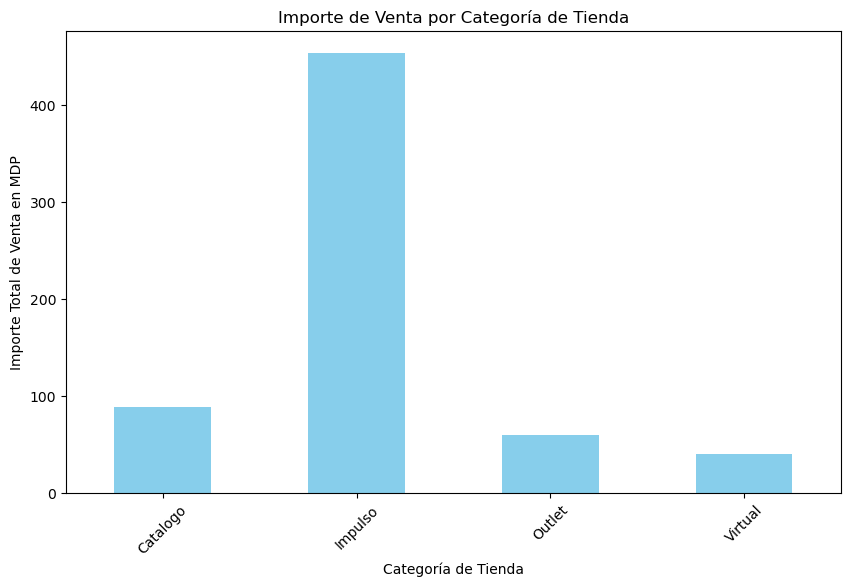

In [350]:
# Calcular el importe total de venta por Categoría de Tienda
ventas_por_categoria_tienda = df.groupby('CATEGORIA_TIENDA', observed=True)['IMPORTE'].sum()/1000000

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_categoria_tienda.plot(kind='bar', color='skyblue')
plt.title('Importe de Venta por Categoría de Tienda')
plt.xlabel('Categoría de Tienda')
plt.ylabel('Importe Total de Venta en MDP')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


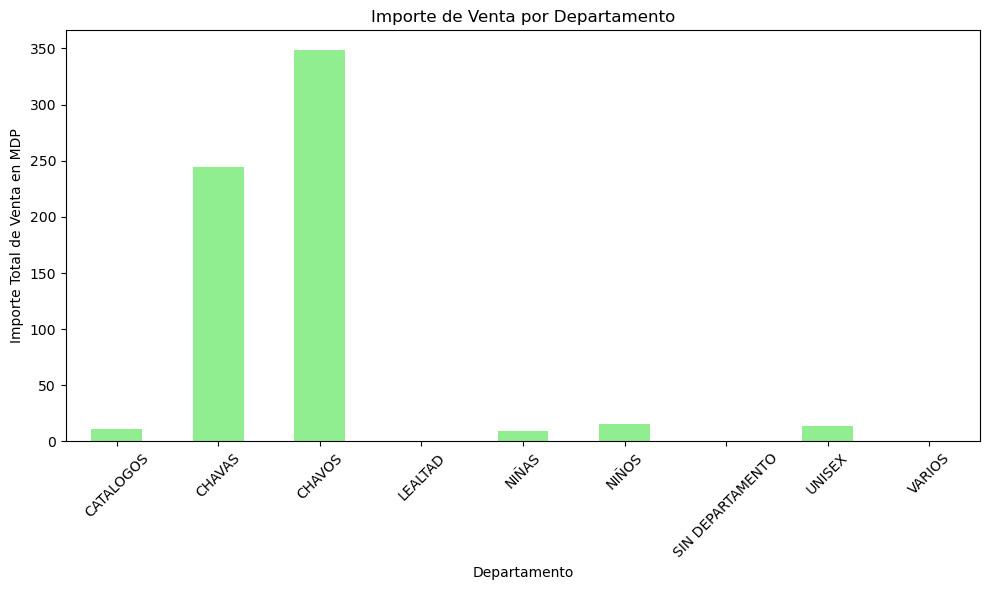

In [351]:
# Calcular el importe total de venta por Departamento
ventas_por_departamento = df.groupby('DEPARTAMENTO', observed=True)['IMPORTE'].sum()/1000000

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_departamento.plot(kind='bar', color='lightgreen')
plt.title('Importe de Venta por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Importe Total de Venta en MDP')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [352]:
# Determinar el importe de 'SINCODIG'

# Calcular y formatear el importe total y el porcentaje en una sola línea
importe_sincodig_formateado, porcentaje_sincodig_formateado = '${:,.2f}'.format(df[df['CODIGO'] == 'SINCODIG']['IMPORTE'].sum()), '{:.2%}'.format(df[df['CODIGO'] == 'SINCODIG']['IMPORTE'].sum() / df['IMPORTE'].sum())

print(f"Importe total SINCODIG: {importe_sincodig_formateado}, Porcentaje del importe total: {porcentaje_sincodig_formateado}")

Importe total SINCODIG: $1,509,039.81, Porcentaje del importe total: 0.23%


In [353]:
# Tamaño Antes de Filtrar
print(df.shape[0])

# FILTRAR POSITIVOS 
df = df[df['CANTIDAD'] > 0].copy()
# Filtar los codigos 'SINCODIG
df = df[(df['CODIGO'] != 'SINCODIG')].copy()
# Filtar las tiendas OUT y VIR
df = df[(df['CATEGORIA_TIENDA'] != 'Outlet')].copy()
# Filtrar solo departamento 'CHAVOS' y 'CHAVAS'
df = df[df['DEPARTAMENTO'].isin(['CHAVOS', 'CHAVAS'])].copy()
# Filtrar tiendas que cerraron 
df = df[(df['TIPO_TIENDA'] != 'Transición')].copy()
# Tamaño despues de filtrar
print(df.shape[0])

df.apply(pd.Series.nunique)


5111926
3092141


NO_ALMACEN                107
NOMBRE_ALMACEN            107
POBLACION                  72
MUNICIPIO                  75
CODIGO_POSTAL              97
TIPO_UBICACION              5
ESTADO                     21
CATEGORIA_TIENDA            3
CLIMA                       4
MES_CAMBIO                 10
TIPO_TIENDA                 2
NO_CLIENTE             312695
NOMBRE_CLIENTE         308731
LISTA                       7
CODIGO                   2943
DESCRIPCION_ESTILO      11689
TALLA                      27
PROVEEDOR                  28
DEPARTAMENTO                2
LINEA                      16
SUBLINEA                   15
TEMPORADA                   6
AÑO_PRIMERA_VENTA          14
IMPRESION                  34
MARCA                      24
ESTILO_VIDA                30
ESTATUS_NUESTRO             8
ORIGEN                      6
RUTINA_ESPECIAL             8
RESURTIDO_one_SHOT          3
UBICACIÓN_VENTA             3
DOCUMENTO             1511171
FECHA                     912
TIPO_CLIEN

In [354]:
# Descartar las columnas que no sirven
df = df.drop(['NO_ALMACEN', 'NO_CLIENTE', 'NOMBRE_CLIENTE', 'MES_CAMBIO', 'CODIGO', 'TALLA', 'DOCUMENTO', 'DESCRIPCION_ESTILO', 'FECHA', 'LISTA', 'TIPO_CLIENTE', 'IMPRESION', 'UBICACIÓN_VENTA'], axis=1)


SEGUNDO FILTRO

1. Filtrar ESTATUS_NUESTRO = 'LINEA' o 'TRANSICION'
2. Filtrar RESURTIDO_one_SHOT != 'ONE SHOT'

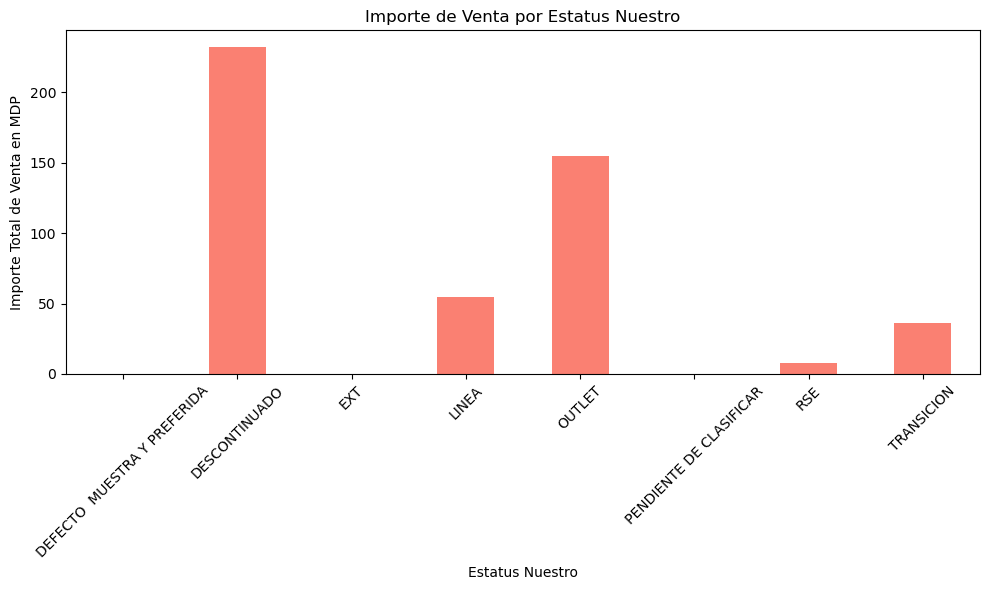

In [355]:
# Calcular el importe total de venta por Estatus Nuestro
ventas_por_Estatus_Nuestro = df.groupby('ESTATUS_NUESTRO', observed=True)['IMPORTE'].sum()/1000000

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_Estatus_Nuestro.plot(kind='bar', color='salmon')
plt.title('Importe de Venta por Estatus Nuestro')
plt.xlabel('Estatus Nuestro')
plt.ylabel('Importe Total de Venta en MDP')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


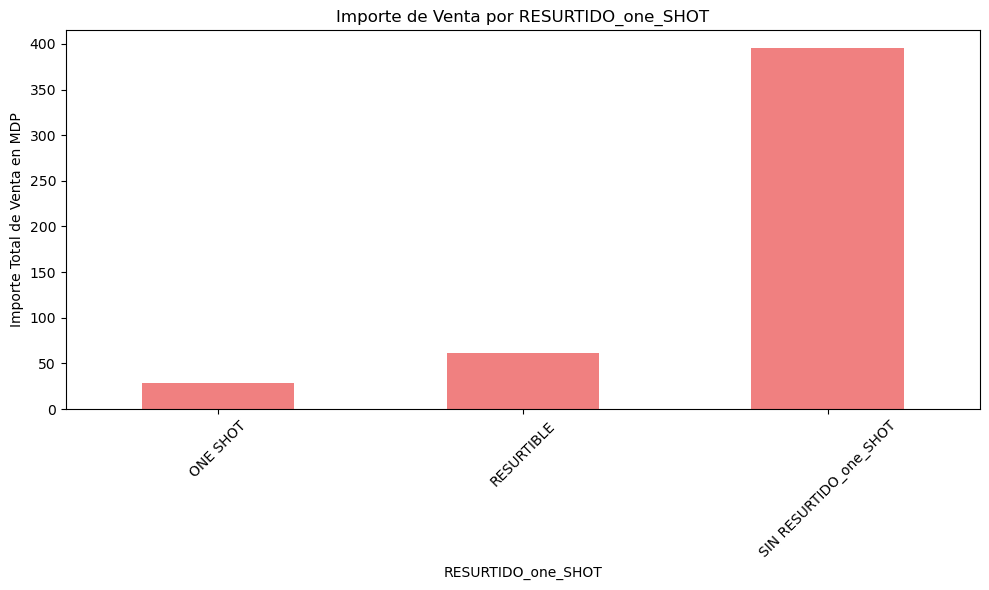

In [356]:
# Calcular el importe total de venta por RESURTIDO_one_SHOT
ventas_por_RESURTIDO_one_SHOT = df.groupby('RESURTIDO_one_SHOT', observed=True)['IMPORTE'].sum()/1000000

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_RESURTIDO_one_SHOT.plot(kind='bar', color='lightcoral')
plt.title('Importe de Venta por RESURTIDO_one_SHOT')
plt.xlabel('RESURTIDO_one_SHOT')
plt.ylabel('Importe Total de Venta en MDP')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [357]:
# Definir las columnas por las cuales agrupar
group_columns = [
    'AÑO_VENTA', 'SEMANA_VENTA', 'NOMBRE_ALMACEN', 'SKU', 'POBLACION', 'MUNICIPIO', 'ESTADO', 'CODIGO_POSTAL',
    'TIPO_UBICACION', 'CATEGORIA_TIENDA', 'CLIMA', 'TIPO_TIENDA', 'PROVEEDOR', 'DEPARTAMENTO', 'LINEA', 'SUBLINEA', 
    'TEMPORADA', 'AÑO_PRIMERA_VENTA', 'MARCA', 'ESTILO_VIDA', 'ESTATUS_NUESTRO', 'ORIGEN', 'RUTINA_ESPECIAL', 
    'RESURTIDO_one_SHOT'
]

# Agrupar por las columnas definidas y sumar las columnas CANTIDAD e IMPORTE
df = df.groupby(group_columns).agg({'CANTIDAD': 'sum', 'IMPORTE': 'sum'}).reset_index()

# Crear una columna de fecha a partir de AÑO_VENTA y SEMANA_VENTA
df['FECHA'] = pd.to_datetime(df['AÑO_VENTA'].astype(str) + '-W' + df['SEMANA_VENTA'].astype(str) + '-1', format='%Y-W%U-%w')

# Definir el nuevo orden de las columnas
nuevo_orden = ['FECHA'] + group_columns + ['CANTIDAD', 'IMPORTE']

# Reordenar las columnas
df = df[nuevo_orden]

# Ordenar el DataFrame por las columnas de agrupación
df = df.sort_values(by=group_columns)


In [358]:
df.apply(pd.Series.nunique)

print(df.shape[0])

# Ap;icar filtro a ESTATUS_NUESTRO y RESURTIDO_one_SHOT
df = df[df['ESTATUS_NUESTRO'].isin(['LINEA'])]
df = df[df['RESURTIDO_one_SHOT'] == 'RESURTIBLE']

print(df.shape[0])

df.apply(pd.Series.nunique)


2589508
136719


FECHA                  130
AÑO_VENTA                3
SEMANA_VENTA            52
NOMBRE_ALMACEN         107
SKU                    583
POBLACION               72
MUNICIPIO               75
ESTADO                  21
CODIGO_POSTAL           97
TIPO_UBICACION           5
CATEGORIA_TIENDA         3
CLIMA                    4
TIPO_TIENDA              2
PROVEEDOR                2
DEPARTAMENTO             2
LINEA                    4
SUBLINEA                 8
TEMPORADA                1
AÑO_PRIMERA_VENTA        7
MARCA                    1
ESTILO_VIDA             14
ESTATUS_NUESTRO          1
ORIGEN                   3
RUTINA_ESPECIAL          3
RESURTIDO_one_SHOT       1
CANTIDAD                39
IMPORTE               1453
dtype: int64

In [359]:
# Verificar duplicados en el DataFrame original
duplicados = df[df.duplicated(subset=['SKU', 'NOMBRE_ALMACEN', 'FECHA'], keep=False)]
print(f"Duplicados encontrados: {len(duplicados)}")

# Mostrar los duplicados encontrados
if len(duplicados) > 0:
    print(duplicados)
    duplicados.to_csv('Resultados/Duplicados.csv', index=False, sep=',', encoding='utf-8-sig')

Duplicados encontrados: 0


In [360]:
def optimize_memory(df):
    for col in df.select_dtypes(include=['int']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['object']).columns:
        num_unique_values = len(df[col].unique())
        num_total_values = len(df[col])
        if num_unique_values / num_total_values < 0.5:
            df[col] = df[col].astype('category')
    return df

df = optimize_memory(df)

print(df.dtypes)

# Guardar datos en un nuevo archivo
df.to_csv('Datos/Ventas_Resurtibles.csv', index=False, sep=',', encoding='utf-8-sig')

FECHA                 datetime64[ns]
AÑO_VENTA                      int16
SEMANA_VENTA                  UInt32
NOMBRE_ALMACEN              category
SKU                         category
POBLACION                   category
MUNICIPIO                   category
ESTADO                      category
CODIGO_POSTAL               category
TIPO_UBICACION              category
CATEGORIA_TIENDA            category
CLIMA                       category
TIPO_TIENDA                 category
PROVEEDOR                   category
DEPARTAMENTO                category
LINEA                       category
SUBLINEA                    category
TEMPORADA                   category
AÑO_PRIMERA_VENTA           category
MARCA                       category
ESTILO_VIDA                 category
ESTATUS_NUESTRO             category
ORIGEN                      category
RUTINA_ESPECIAL             category
RESURTIDO_one_SHOT          category
CANTIDAD                        int8
IMPORTE                      float32
d